# Linear Regression with PyTorch
Simple Linear Regression model with PyTorch.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

## Data Preparation
Generate dummy data and prepare it to be given to the model.

In [3]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], 
                   [102, 43, 37], [69, 96, 70], [74, 66, 43], 
                   [91, 87, 65], [88, 134, 59], [101, 44, 37], 
                   [68, 96, 71], [73, 66, 44], [92, 87, 64], 
                   [87, 135, 57], [103, 43, 36], [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], 
                    [22, 37], [103, 119],[57, 69], 
                    [80, 102], [118, 132], [21, 38], 
                    [104, 118], [57, 69], [82, 100], 
                    [118, 134], [20, 38], [102, 120]], 
                   dtype='float32')

# Transform data from numpy to tensor
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

print(f"Input data shape:\t{inputs.shape}\n")
print(f"Target data shape:\t{targets.shape}")

# Convert data into Tensor tuple
train = TensorDataset(inputs, targets)
# Split data into batches
batch_size = 5
train = DataLoader(train, batch_size, shuffle=True)

Input data shape:	torch.Size([15, 3])

Target data shape:	torch.Size([15, 2])


## Model

In [4]:
class LinearRegression():
  def __init__(self, inputs, outputs, learning_rate, epochs):
    # Iterations of the dataset
    self.epochs = epochs
    # Linear layer - fully connected
    self.model = nn.Linear(inputs, outputs)
    # Assign loss function - Mean Squared Error
    self.loss = F.mse_loss
    # Assign optimizer - Stochastic Gradient Descent
    self.opt = torch.optim.SGD(self.model.parameters(), lr=learning_rate)

    self.history = {
        "loss": [],
        "epochs": range(self.epochs)
    }

  # Trains the model   
  def fit(self, train):
    # How many times to go over the whole dataset
    for epoch in range(self.epochs):
      # Go through a given number of examples
      for x_batch, y_batch in train:
        # 1) Model generates the predictions
        predictions = self.model(x_batch)
        # 2) Update the loss for current predictions
        loss = self.loss(predictions, y_batch)
        # 3) Compute gradients
        loss.backward()
        # 4) Update parameters
        self.opt.step()
        # 5) Reset gradients
        self.opt.zero_grad()

      # Append loss from current batch
      self.history["loss"].append(round(loss.item() / 100, 2))
      
      # Display progress
      print(f"Epoch [{epoch}/{self.epochs}], Loss: {round(loss.item() / 100, 2)}")
    
  # Predict new training examples
  def predict(self, x):
    return self.model(x)

In [5]:
# Call Linear Regression model
lr = LinearRegression(inputs.shape[1], targets.shape[1], 1e-5, 10)
lr.fit(train)

Epoch [0/10], Loss: 38.19
Epoch [1/10], Loss: 23.99
Epoch [2/10], Loss: 9.35
Epoch [3/10], Loss: 3.8
Epoch [4/10], Loss: 1.64
Epoch [5/10], Loss: 1.45
Epoch [6/10], Loss: 2.01
Epoch [7/10], Loss: 1.24
Epoch [8/10], Loss: 1.24
Epoch [9/10], Loss: 1.47


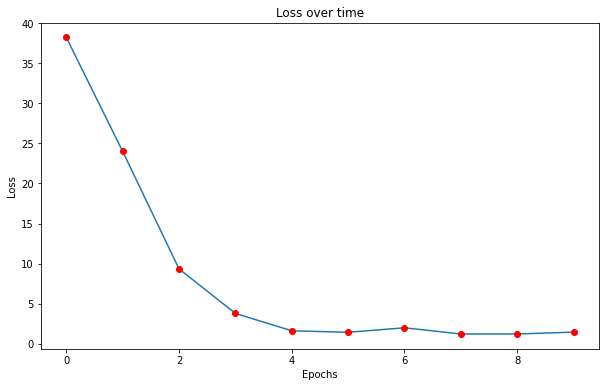

In [6]:
# Display loss over time
plt.figure(figsize=(10, 6))
plt.title("Loss over time")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(lr.history["epochs"], lr.history["loss"])
plt.plot(lr.history["epochs"], lr.history["loss"], "or")
plt.show()

In [8]:
lr.predict(torch.tensor([[75, 63, 44.]]))

tensor([[57.0544, 73.1434]], grad_fn=<AddmmBackward0>)